In [32]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist

In [33]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('The current size of our dataset is : \nX_train -> '
      ,X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' 
      , X_test.shape,'\ny_test' , y_test.shape )


The current size of our dataset is : 
X_train ->  (60000, 28, 28) 
y_train ->  (60000,) 
X_test ->  (10000, 28, 28) 
y_test (10000,)


In [34]:
print('X_train shape before : ',X_train.shape)
print('X_test shape before : ',X_test.shape)
# we convert the data to 2D(numsample , image_dimension) 
#with our images present as 1D vectors
X_train = X_train.reshape(len(X_train),-1) 
X_test = X_test.reshape(len(X_test),-1)
print('X_train shape after : ',X_train.shape)
print('X_test shape after : ',X_test.shape)
'''
we are reshaping the original (60000, 28, 28) 
array (60000 images, each of size 28x28) 
into a 2D array of shape (60000, 784)
'''
# we scale our features using normalization

X_train = X_train/255 
X_test = X_test/255 

X_train shape before :  (60000, 28, 28)
X_test shape before :  (10000, 28, 28)
X_train shape after :  (60000, 784)
X_test shape after :  (10000, 784)


In [35]:
arr = [3,2,1,4] # output should be 
# 2 -> [1] 
# 1 -> [2]
# 0 -> [3]
# 3 -> [4]
print(arr)
indices = np.argsort(arr)
print(indices)
sorted_arr = [arr[i] for i in indices]
sorted_arr

[3, 2, 1, 4]
[2 1 0 3]


[1, 2, 3, 4]

In [36]:
k = 3

def eucledean_dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def most_voted(k_nearest):
    nearest = max((k_nearest),key = k_nearest.count)
    return nearest

def knn(X_train,X_test,y_train,k):
    y_pred = []

    for test_samples in X_test:
        distances = []
        for train_samples in X_train:
            dist = eucledean_dist(test_samples,train_samples)
            distances.append(dist)
        # now we take the indices of the nearest k values after they are sorted
        indices = np.argsort(distances)[:k] 
        
        k_nearest = [y_train[i] for i in indices] 
        nearest = most_voted(k_nearest)
        y_pred.append(nearest)

    return np.array(y_pred)


In [37]:
# org X_train is taking a lot of time so i am shortening the size
X_test_small,y_test_small = X_test[:1000],y_test[:1000]
X_train_small,y_train_small = X_train[:1000],y_train[:1000]
y_pred = knn(X_train_small,X_test_small,y_train_small,k=5)

In [38]:
accuracy = np.sum(y_pred == y_test_small)/ len(y_test_small)
# i am printing less labels for better view
print(f"Predicted labels: {y_pred[:50]}")
print(f"Actual labels:    {y_test_small[:50]}")
print(f"Accuracy: {accuracy * 100:.2f}%")

Predicted labels: [7 2 1 0 4 1 9 9 4 7 0 6 9 0 1 3 9 7 3 9 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 1 5 5 1 4 4 4]
Actual labels:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
Accuracy: 82.30%


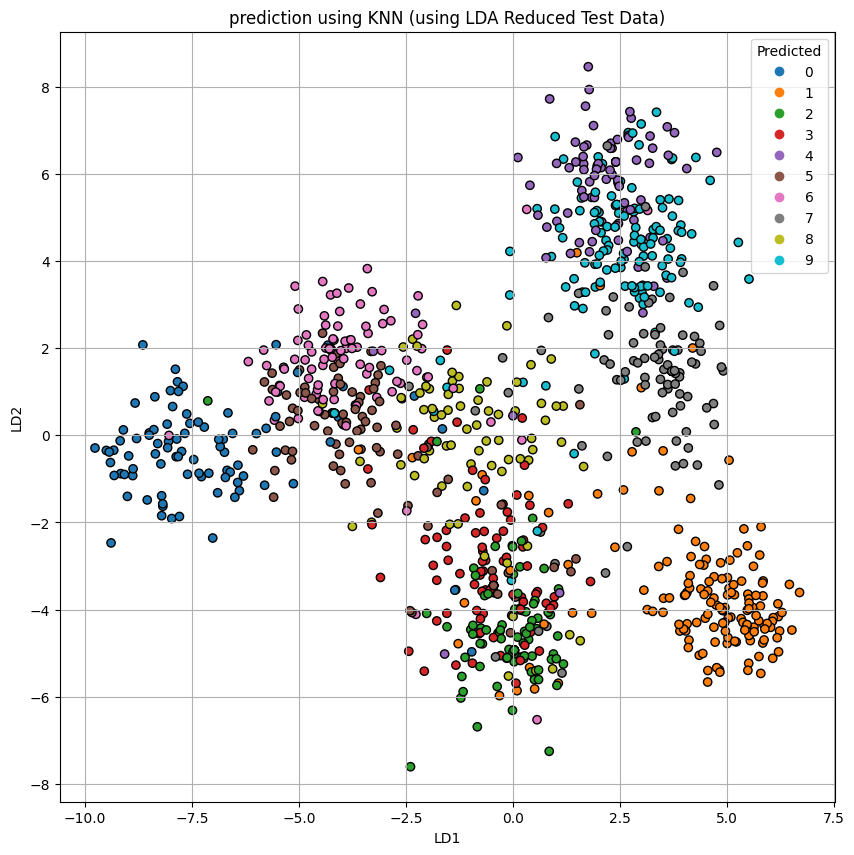

'\nwe see that why the accuracy is only around 86.60%. \nA lot of the digits are overlapping (3,5,8) and (4,9), \nso KNN gets confused in those crowded areas. \nSome classes clear, but others are just too mixed up \nfor KNN to handle to classify.\n'

In [ ]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_reduced = lda.fit_transform(X_test_small, y_test_small)

'''
X_test was the data reduced to 2 dimension 
and y_test is the label to classify them
'''
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='tab10', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Predicted")
plt.title("prediction using KNN (using LDA Reduced Test Data)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.grid(True)
plt.show()

'''
we see that why the accuracy is only around 86.60%. 
A lot of the digits are overlapping (3,5,8,2) , (4,9), 
and other overlaps as well
so KNN gets confused in those crowded areas. 
Some classes clear, but others are just too mixed up 
for KNN to handle to classify.
'''
